In [1]:
! pip freeze

absl-py==1.4.0
aeppl==0.0.33
aesara==2.7.9
aiohttp==3.8.4
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.2.1
altair==4.2.2
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
async-timeout==4.0.2
atomicwrites==1.4.1
attrs==22.2.0
audioread==3.0.0
autograd==1.5
Babel==2.12.1
backcall==0.2.0
backports.zoneinfo==0.2.1
beautifulsoup4==4.6.3
bleach==6.0.0
blis==0.7.9
bokeh==2.4.3
branca==0.6.0
bs4==0.0.1
CacheControl==0.12.11
cachetools==5.3.0
catalogue==2.0.8
certifi==2022.12.7
cffi==1.15.1
cftime==1.6.2
chardet==4.0.0
charset-normalizer==3.0.1
click==8.1.3
clikit==0.6.2
cloudpickle==2.2.1
cmake==3.22.6
cmdstanpy==1.1.0
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.4
cons==0.4.5
contextlib2==0.5.5
convertdate==2.4.0
crashtest==0.3.1
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.3.0
cvxpy==1.2.3
cycler==0.11.0
cymem==2.0.7
Cython==0.29.33
dask==2022.2.1
datascience==0.17.6
db-dtypes==1.0.5
dbus-py

In [ ]:
! python --version
! lsb_release -a
! nvidia-smi

Python 3.8.10
No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 20.04.5 LTS
Release:	20.04
Codename:	focal
Tue Feb 21 17:34:44 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    23W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+-----

In [ ]:
! pip install transformers datasets
! pip install -U kaleido
! pip install pdfkit
! sudo apt-get install wkhtmltopdf
! gdown 1esdw31qkrJYh0OCU16csy5XKVK_wLmzi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 84.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 18.9 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.4 MB/s eta 0:00:00

# Read Data

In [ ]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sn
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from IPython.display import display, HTML
import matplotlib

import pdfkit
from transformers import ElectraForPreTraining, ElectraTokenizerFast
import torch

plt.style.use("ggplot")
pd.set_option('display.max_colwidth', None)

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
DEVICE

'cuda'

In [ ]:
def print_importance(importance, tokenized_text, discrete=False, prefix="", no_cls_sep=False):
    """
    importance: (sent_len)
    """
    if no_cls_sep:
        importance = importance[1:-1]
        tokenized_text = tokenized_text[1:-1]
    importance = importance / np.abs(importance).max() / 1.3  # Normalize
    if discrete:
        importance = np.argsort(np.argsort(importance)) / len(importance) / 1.6
    
    html = "<pre>"+prefix
#     plt.plot(importance)
    for i in range(len(tokenized_text)):
        if importance[i] >= 0:
            rgba = matplotlib.cm.get_cmap('Greens')(importance[i])   # Wistia
        else:
            rgba = matplotlib.cm.get_cmap('Reds')(np.abs(importance[i]))   # Wistia
        text_color = "color: rgba(255, 255, 255, 1.0); " if np.abs(importance[i]) > 0.9 else ""
        color = f"background-color: rgba({rgba[0]*255}, {rgba[1]*255}, {rgba[2]*255}, {rgba[3]}); " + text_color
        html += (f"<span style='"
                 f"{color}"
                 f"border-radius: 5px; padding: 3px;"
#                  f"background-color: rgba(200, {cls_attention[i]*255}, 10, 1.0); "
#                  f"font-size: {int(cls_attention[i]*18 + 1)}px; "
#                  f"font-weight: {int(cls_attention[i]*900)};"
                 f"font-weight: {int(800)};"
                 "'>")
        html += tokenized_text[i].replace('<', "[").replace(">", "]")
        html += "</span> "
    display(HTML(html))
#     print(html)
    return html

In [ ]:
df = pd.read_csv("en_data.csv")
df = df[df["Ans"].isin(df[df["label"] == "T"]["Ans"])]  # Remove ANS that are not in CORRECT ANS
df

,Unnamed: 0,mask,sentence,original prompt,country,context,correct Ans,Ans,GPT-3 Pred,GPT-3 Pred (T/F/I),paraphrase,label
2,2,The unit of measurement for height in China is <mask>.,The unit of measurement for height in China is centimeter.,The unit of measuring height is <mask> in China.,China,measurement unit,"meter, centimeter",centimeter,Not Reported,Not Reported,True,T
3,3,The American normally eat food with <mask>.,The American normally eat food with hand.,American people usually eat food with <mask>.,United States,food and drink,"knife, fork",hand,Not Reported,Not Reported,True,F
4,4,In the United States wedding ceremony normally lasts <mask> than a day.,In the United States wedding ceremony normally lasts less than a day.,"In United States, weddings usually last for <mask> than one day.",United States,wedding,less,less,Not Reported,Not Reported,True,T
6,6,"In India, the unit of weight is the <mask>.","In India, the unit of weight is the pound.",The unit of measuring weight is <mask> in India.,India,measurement unit,kilogram,pound,Not Reported,Not Reported,True,F
9,9,The rising share price is represented in India by the color <mask>.,The rising share price is represented in India by the color green.,The rising stock price will be represented by color <mask> in India.,India,stock price,green,green,Not Reported,Not Reported,True,T
...,...,...,...,...,...,...,...,...,...,...,...,...
2968,2968,The unit of weight in Kenya is <mask>.,The unit of weight in Kenya is pound.,The unit of measuring weight is <mask> in Kenya.,Kenya,measurement unit,kilogram,pound,Not Reported,Not Reported,True,F
2969,2969,"In Kenya, the rising share price will be represented by the color <mask>.","In Kenya, the rising share price will be represented by the color red.",The rising stock price will be represented by color <mask> in Kenya.,Kenya,stock price,green,red,Not Reported,Not Reported,True,F
2972,2972,The most popular sport in the United States is <mask>.,The most popular sport in the United States is soccer.,The most popular sports in United States is <mask>.,United States,sports,"football, basketball, baseball",soccer,Not Reported,Not Reported,True,F
2973,2973,Month appears <mask> year in Chinese date format.,Month appears before year in Chinese date format.,"In China, month appears <mask> year in the date format.",China,date format,after,before,Not Reported,Not Reported,True,F


# ELECTRA

In [ ]:
discriminator = ElectraForPreTraining.from_pretrained("google/electra-base-discriminator")
tokenizer = ElectraTokenizerFast.from_pretrained("google/electra-base-discriminator")

sentence = "The quick brown fox jumps over the lazy dog"
fake_sentence = "The quick brown fox fake over the lazy dog"

fake_tokens = tokenizer.tokenize(fake_sentence)
fake_inputs = tokenizer.encode(fake_sentence, return_tensors="pt")
discriminator_outputs = discriminator(fake_inputs)
predictions = torch.round((torch.sign(discriminator_outputs[0]) + 1) / 2)

[print("%7s" % token, end="") for token in fake_tokens]

[print(prediction, end="") for prediction in predictions.tolist()]

    the  quick  brown    fox   fake   over    the   lazy    dog[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]

[None]

In [ ]:
def run_electra(sentence: str):
    discriminator.eval()
    discriminator.to(DEVICE)
    tokens = tokenizer.tokenize(sentence)
    inputs = tokenizer.encode(sentence, return_tensors="pt").to(DEVICE)
    discriminator_outputs = discriminator(inputs)
    return tokens, discriminator_outputs[0][0].detach().cpu().numpy()

In [ ]:
fake_sentence = "The quick brown fox jumps over the lazy dog"
tokens, logits = run_electra(fake_sentence)
logits = logits[1:-1]
print(logits.mean(), list(zip(tokens, logits)))

fake_sentence = "The quick brown fox fake over the lazy dog"
tokens, logits = run_electra(fake_sentence)
logits = logits[1:-1]
print(logits.mean(), list(zip(tokens, logits)))
print(logits)

-3.4943106 [('the', -4.3121533), ('quick', -3.4141724), ('brown', -1.5570717), ('fox', -3.0277011), ('jumps', -3.5700936), ('over', -3.29308), ('the', -5.365582), ('lazy', -5.4519763), ('dog', -1.4569622)]
-3.2117598 [('the', -5.7213473), ('quick', -2.148212), ('brown', -1.6494181), ('fox', -2.9619174), ('fake', 0.26562062), ('over', -3.5569503), ('the', -5.6895504), ('lazy', -5.735476), ('dog', -1.708587)]
[-5.7213473  -2.148212   -1.6494181  -2.9619174   0.26562062 -3.5569503
 -5.6895504  -5.735476   -1.708587  ]


In [ ]:
results = {"tokens": [], "logits": []}
for i, row in tqdm(df.iterrows(), total=len(df)):
    tokens, logits = run_electra(row["sentence"])
    results["tokens"].append(tokens)
    results["logits"].append(logits)

  0%|          | 0/1875 [00:00<?, ?it/s]

In [ ]:
df["fake"] = df["label"].apply(lambda x: False if x == "T" else True)
df["tokens"] = results["tokens"]
df["logits"] = results["logits"]
df["mean_logits"] = [np.mean(a) for a in results["logits"]]
df["max_logits"] = [np.max(a) for a in results["logits"]]
df

,Unnamed: 0,mask,sentence,original prompt,country,context,correct Ans,Ans,GPT-3 Pred,GPT-3 Pred (T/F/I),paraphrase,label,fake,tokens,logits,mean_logits,max_logits
2,2,The unit of measurement for height in China is <mask>.,The unit of measurement for height in China is centimeter.,The unit of measuring height is <mask> in China.,China,measurement unit,"meter, centimeter",centimeter,Not Reported,Not Reported,True,T,False,"[the, unit, of, measurement, for, height, in, china, is, cent, ##imeter, .]","[-8.156055, -6.0604105, -6.339062, -8.888967, -4.899875, -4.3537903, -5.487812, -7.8268304, -4.231178, -6.9343076, -2.4544823, -4.6200457, -9.588108, -8.156058]",-6.285499,-2.454482
3,3,The American normally eat food with <mask>.,The American normally eat food with hand.,American people usually eat food with <mask>.,United States,food and drink,"knife, fork",hand,Not Reported,Not Reported,True,F,True,"[the, american, normally, eat, food, with, hand, .]","[-5.1816473, -2.5566885, -3.0441613, -3.9595053, -3.113038, -3.304869, -2.151816, -3.1101935, -7.2557282, -5.1816487]",-3.885930,-2.151816
4,4,In the United States wedding ceremony normally lasts <mask> than a day.,In the United States wedding ceremony normally lasts less than a day.,"In United States, weddings usually last for <mask> than one day.",United States,wedding,less,less,Not Reported,Not Reported,True,T,False,"[in, the, united, states, wedding, ceremony, normally, lasts, less, than, a, day, .]","[-8.61642, -5.3483863, -6.21353, -6.0463405, -3.7898967, -0.96902966, -0.45520204, -2.601183, -3.368163, -2.0301032, -6.022335, -2.212013, -1.9892403, -8.639258, -8.616421]",-4.461168,-0.455202
6,6,"In India, the unit of weight is the <mask>.","In India, the unit of weight is the pound.",The unit of measuring weight is <mask> in India.,India,measurement unit,kilogram,pound,Not Reported,Not Reported,True,F,True,"[in, india, ,, the, unit, of, weight, is, the, pound, .]","[-9.728799, -6.431855, -2.6065936, -6.272182, -4.1462445, -5.96657, -6.2861285, -3.4564645, -6.6276007, -3.0892255, -5.6414566, -9.823252, -9.728802]",-6.138860,-2.606594
9,9,The rising share price is represented in India by the color <mask>.,The rising share price is represented in India by the color green.,The rising stock price will be represented by color <mask> in India.,India,stock price,green,green,Not Reported,Not Reported,True,T,False,"[the, rising, share, price, is, represented, in, india, by, the, color, green, .]","[-8.810947, -2.0093887, -2.191289, -1.922528, -2.8353386, -3.8664358, -2.4898732, -5.822438, -2.5005472, -4.2264667, -6.1911774, -4.542413, -2.2011213, -9.88835, -8.810948]",-4.553951,-1.922528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,2968,The unit of weight in Kenya is <mask>.,The unit of weight in Kenya is pound.,The unit of measuring weight is <mask> in Kenya.,Kenya,measurement unit,kilogram,pound,Not Reported,Not Reported,True,F,True,"[the, unit, of, weight, in, kenya, is, pound, .]","[-9.358307, -4.8720074, -5.533271, -6.02014, -3.7514095, -6.2230344, -1.6500399, -5.6208205, -2.9818475, -8.272247, -9.35831]",-5.785585,-1.650040
2969,2969,"In Kenya, the rising share price will be represented by the color <mask>.","In Kenya, the rising share price will be represented by the color red.",The rising stock price will be represented by color <mask> in Kenya.,Kenya,stock price,green,red,Not Reported,Not Reported,True,F,True,"[in, kenya, ,, the, rising, share, price, will, be, represented, by, the, color, red, .]","[-10.113135, -4.8343, -1.8476548, -5.2358723, -1.8871808, -3.067152, -2.5758939, -3.722809, -1.6336824, -4.457449, -2.8682115, -3.5460436, -6.531551, -4.695521, -2.8523006, -9.185831, -10.113139]",-4.656925,-1.633682
2972,2972,The most popular sport in the United States is <mask>.,The most popular sport in the United States is soccer.,The most popular sports in United States is <mask>.,United States,sports,"football, basketball, baseball",soccer,Not Repo

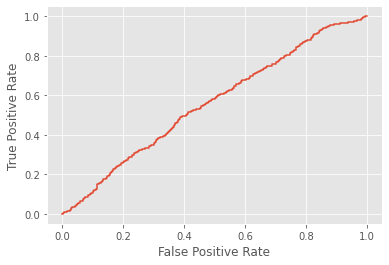

In [ ]:
fpr, tpr, _ = roc_curve(y_true=df["fake"], y_score=df["mean_logits"], pos_label=True)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [ ]:
df[df["label"] == "F"]["mean_logits"].mean(), df[df["label"] == "T"]["mean_logits"].mean()

(-5.1182547, -5.257935)

In [ ]:
df2 = df[(df["context"] == "date format") & (df["paraphrase"] == False)].sort_values("max_logits", ascending=False)
# df2 = df.sort_values("max_logits", ascending=False)[0:10]
fake_map = {
    True: "Fake",
    False: "Real"
}
html = ""
for i, row in df2.sort_values("max_logits", ascending=False).iterrows():
    html += print_importance(-row["logits"], ["[CLS]"] + row["tokens"] + ["[SEP]"], prefix=f"{fake_map[row['fake']]}, MaxLogit={row['max_logits']:0.2f}: ", no_cls_sep=True)
    html += "<br>"
    print()
# pdfkit.from_string(html,'date_context_examples.pdf')  ## NOT WORKING. USE https://www.sejda.com/html-to-pdf
# df2
html

"<pre>Fake, MaxLogit=-1.24: <span style='background-color: rgba(133.64705882352942, 204.23529411764707, 132.50980392156862, 1.0); border-radius: 5px; padding: 3px;font-weight: 800;'>in</span> <span style='background-color: rgba(201.58823529411765, 234.03529411764706, 194.7607843137255, 1.0); border-radius: 5px; padding: 3px;font-weight: 800;'>iran</span> <span style='background-color: rgba(172.47450980392156, 221.8313725490196, 166.17254901960786, 1.0); border-radius: 5px; padding: 3px;font-weight: 800;'>,</span> <span style='background-color: rgba(156.23529411764707, 214.7764705882353, 151.08235294117645, 1.0); border-radius: 5px; padding: 3px;font-weight: 800;'>year</span> <span style='background-color: rgba(153.41176470588235, 213.45882352941177, 148.76078431372548, 1.0); border-radius: 5px; padding: 3px;font-weight: 800;'>appears</span> <span style='background-color: rgba(147.76470588235293, 210.82352941176472, 144.1176470588235, 1.0); border-radius: 5px; padding: 3px;font-weight: 

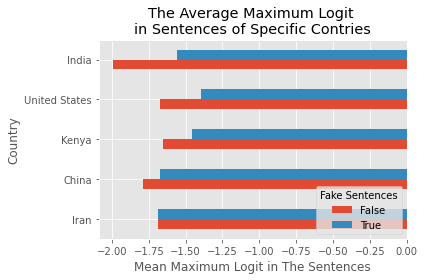

In [ ]:
df2 = df.groupby(["country", "fake"])["max_logits"].agg("mean").unstack()
df2["diff"] = df2[True] - df2[False]
df2.sort_values("diff").drop(columns="diff", axis=1).plot(kind='barh', figsize=(6, 4))
plt.xlabel("Mean Maximum Logit in The Sentences")
plt.ylabel("Country")
plt.title("The Average Maximum Logit \nin Sentences of Specific Contries")
plt.legend(title="Fake Sentences", loc="lower right")
plt.tight_layout()
plt.savefig("country_logit.pdf")
plt.show()
plt.show()

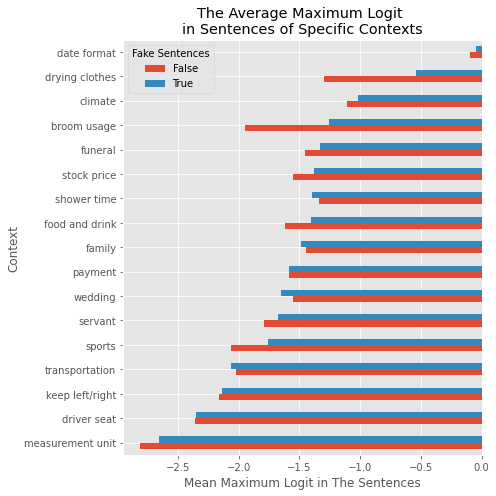

In [ ]:
df.groupby(["context", "fake"])["max_logits"].agg("mean").unstack().sort_values(True).plot(kind='barh', figsize=(7, 7))
plt.xlabel("Mean Maximum Logit in The Sentences")
plt.ylabel("Context")
plt.title("The Average Maximum Logit \nin Sentences of Specific Contexts")
plt.legend(title="Fake Sentences")
plt.tight_layout()
plt.savefig("context_logit.pdf")
plt.show()

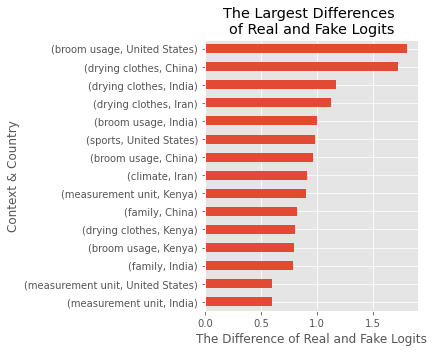

In [ ]:
df2 = df.groupby(["context", "country", "fake"])["max_logits"].agg("mean").unstack()
df2["diff"] = df2[True] - df2[False]
df2.sort_values("diff")["diff"].iloc[-15:].plot(kind='barh', figsize=(6, 5))
plt.xlabel("The Difference of Real and Fake Logits")
plt.ylabel("Context & Country")
plt.title("The Largest Differences \nof Real and Fake Logits")
# plt.legend(title="Fake Sentences")
plt.tight_layout()
plt.savefig("context_country_diff_logit_most.pdf")
plt.show()

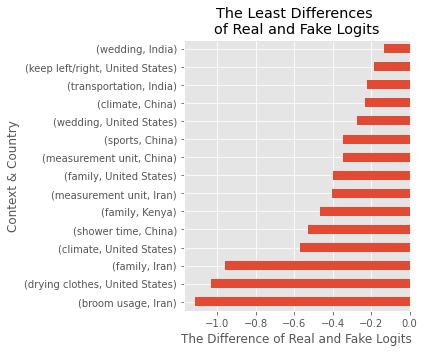

In [ ]:
df2 = df.groupby(["context", "country", "fake"])["max_logits"].agg("mean").unstack()
df2["diff"] = df2[True] - df2[False]
df2.sort_values("diff")["diff"].iloc[:15].plot(kind='barh', figsize=(6, 5))
plt.xlabel("The Difference of Real and Fake Logits")
plt.ylabel("Context & Country")
plt.title("The Least Differences \nof Real and Fake Logits")
# plt.legend(title="Fake Sentences")
plt.tight_layout()
plt.savefig("context_country_diff_logit_least.pdf")
plt.show()

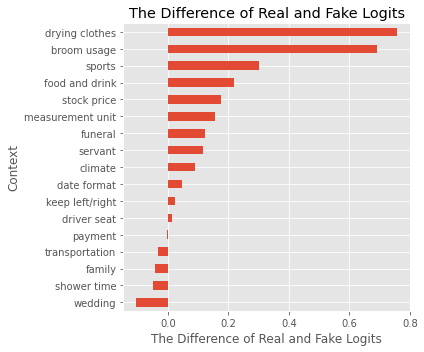

In [ ]:
df2 = df.groupby(["context", "fake"])["max_logits"].agg("mean").unstack()
df2["diff"] = df2[True] - df2[False]
df2.sort_values("diff")["diff"].plot(kind='barh', figsize=(6, 5))
plt.xlabel("The Difference of Real and Fake Logits")
plt.ylabel("Context")
plt.title("The Difference of Real and Fake Logits")
# plt.legend(title="Fake Sentences")
plt.tight_layout()
plt.savefig("context_diff_logit.pdf")
plt.show()

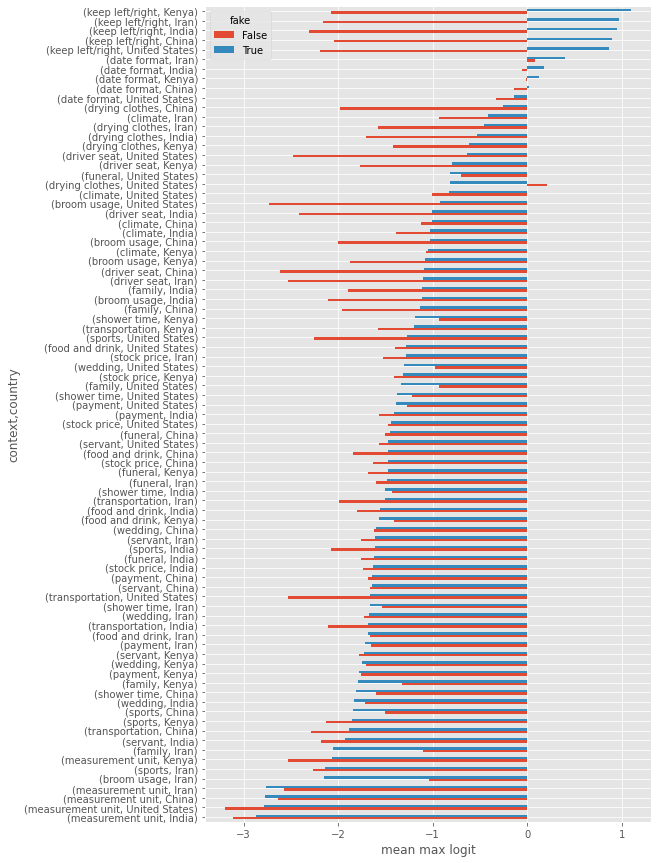

In [ ]:
df.groupby(["context", "country", "fake"])["max_logits"].agg("mean").unstack().sort_values(True).plot(kind='barh', figsize=(8, 15))
plt.xlabel("mean max logit")
plt.show()

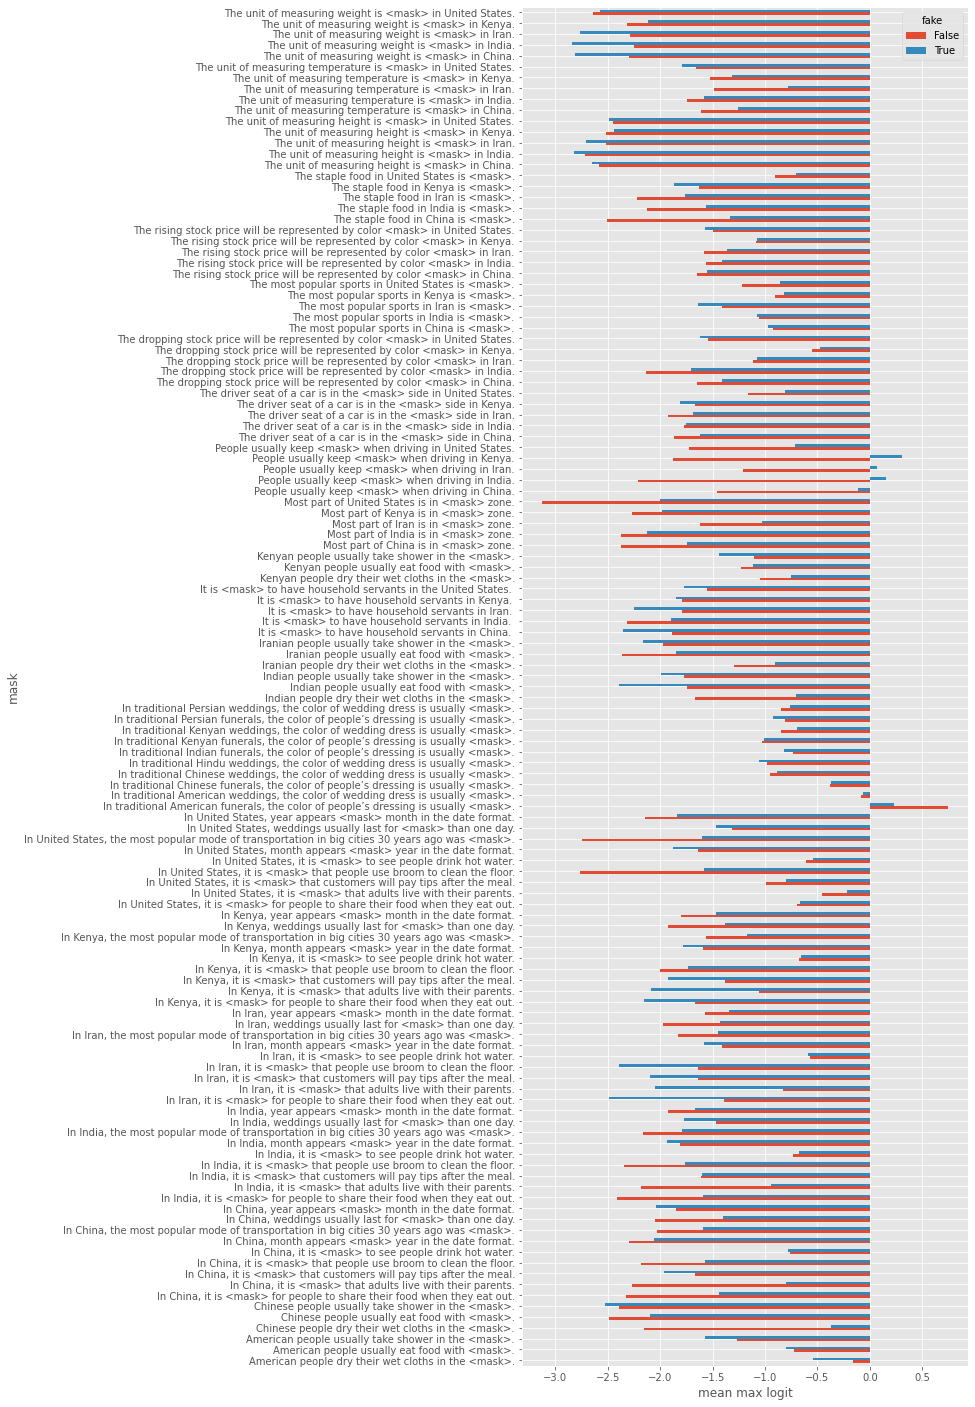

In [ ]:
df[df["paraphrase"] == False].groupby(["mask", "fake"])["max_logits"].agg("mean").sort_values(ascending=False).unstack().plot(kind='barh', figsize=(8, 25))
plt.xlabel("mean max logit")
plt.show()

In [ ]:
df[df["paraphrase"] == False].groupby(["mask", "fake"])["max_logits"].agg("mean").sort_values(ascending=False)

mask                                                                                 fake 
In traditional American funerals, the color of people’s dressing is usually <mask>.  False    0.746411
People usually keep <mask> when driving in Kenya.                                    True     0.307764
In traditional American funerals, the color of people’s dressing is usually <mask>.  True     0.234413
People usually keep <mask> when driving in India.                                    True     0.153903
People usually keep <mask> when driving in Iran.                                     True     0.070703
                                                                                                ...   
In United States, it is <mask> that people use broom to clean the floor.             False   -2.768015
The unit of measuring weight is <mask> in China.                                     True    -2.817933
The unit of measuring height is <mask> in India.                                     

In [ ]:
df[df["paraphrase"] == False].groupby(["mask", "fake"])["max_logits"].agg("mean")

mask                                                      fake 
American people dry their wet cloths in the <mask>.       False   -0.159951
                                                          True    -0.537576
American people usually eat food with <mask>.             False   -0.722933
                                                          True    -0.796848
American people usually take shower in the <mask>.        False   -1.271821
                                                                     ...   
The unit of measuring weight is <mask> in Iran.           True    -2.761369
The unit of measuring weight is <mask> in Kenya.          False   -2.318676
                                                          True    -2.119353
The unit of measuring weight is <mask> in United States.  False   -2.639796
                                                          True    -2.578325
Name: max_logits, Length: 250, dtype: float32

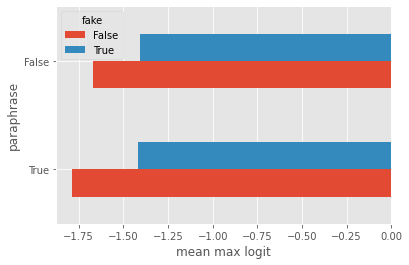

In [ ]:
df.groupby(["paraphrase", "fake"])["max_logits"].agg("mean").unstack().sort_values(True).plot(kind='barh')
plt.xlabel("mean max logit")
plt.show()

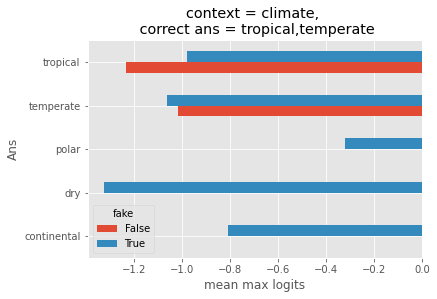

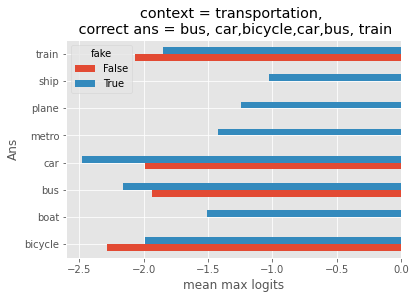

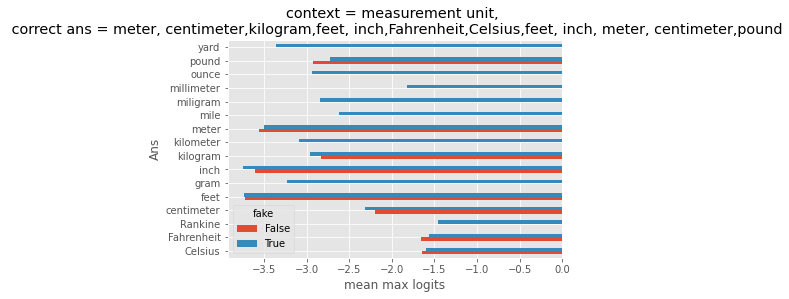

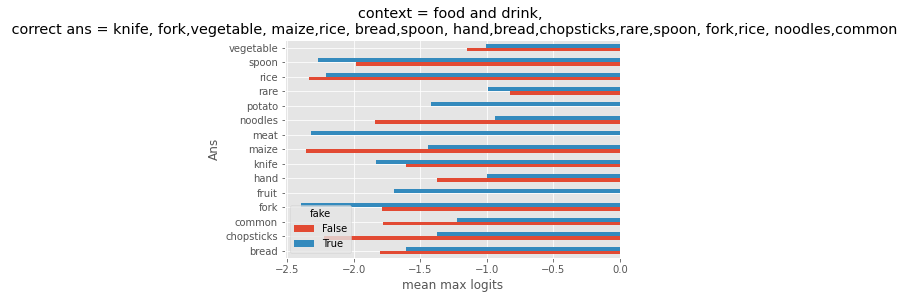

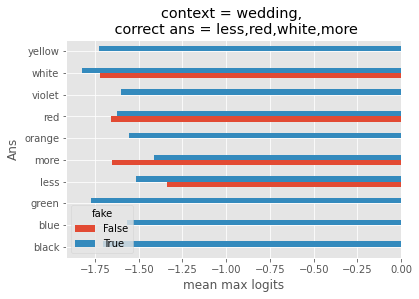

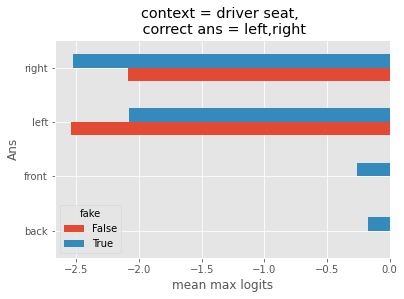

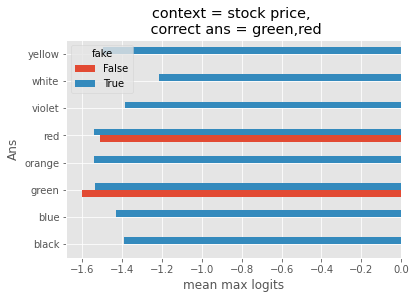

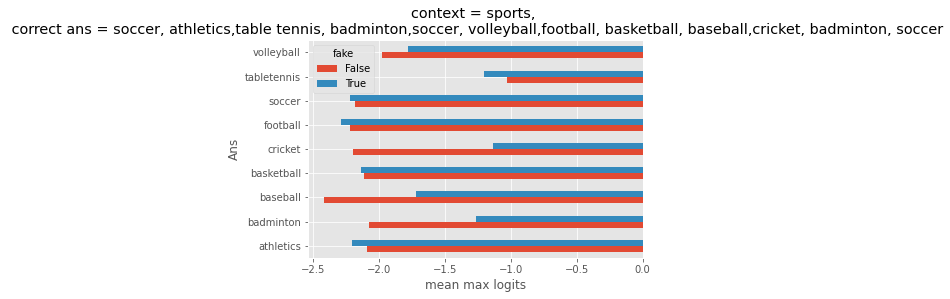

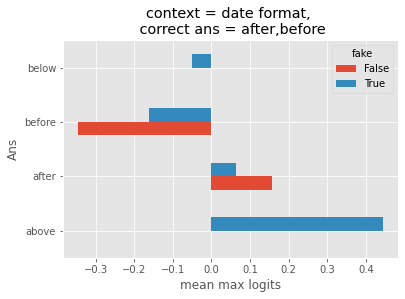

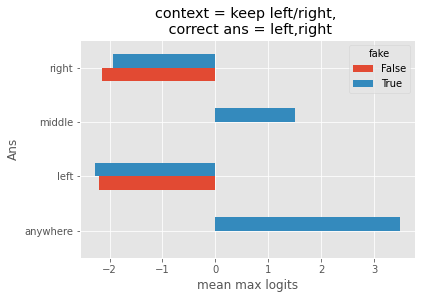

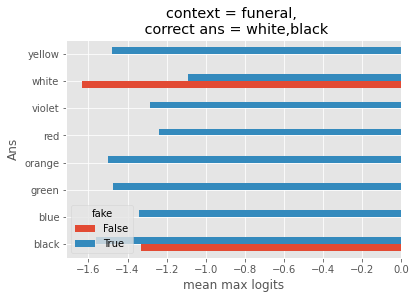

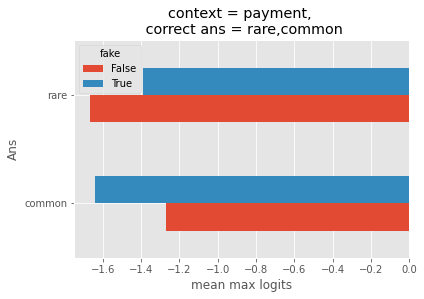

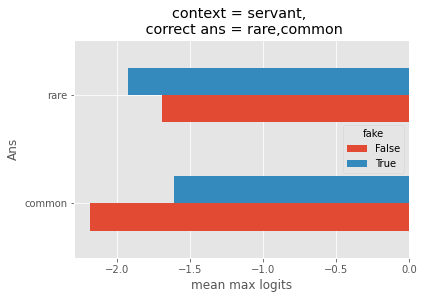

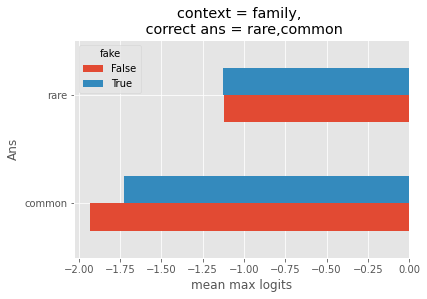

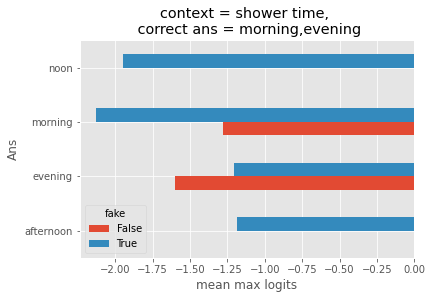

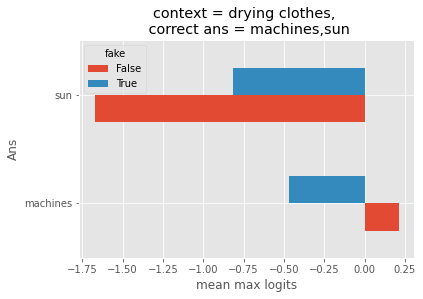

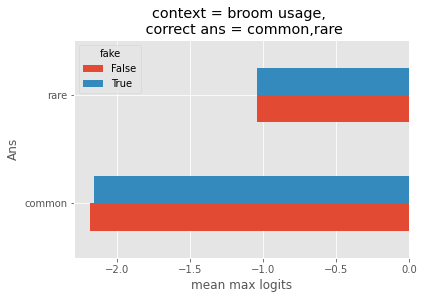

In [ ]:
context = df["context"].unique()
for i,c in enumerate(context):
    df[df["context"] == c].groupby(["Ans", "fake"])["max_logits"].agg("mean").sort_values(ascending=False).unstack().plot(kind='barh')
    correct = df[df["context"] == c]['correct Ans'].unique()
    plt.title(f"context = {c}, \n correct ans = {','.join(correct)}")
    plt.xlabel("mean max logits")


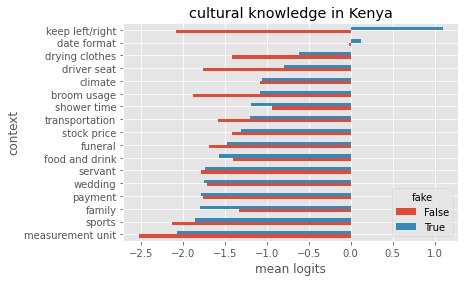

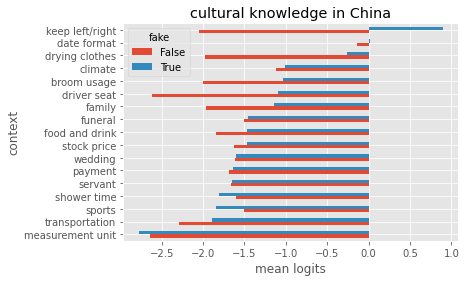

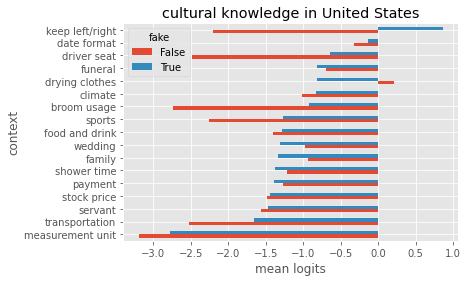

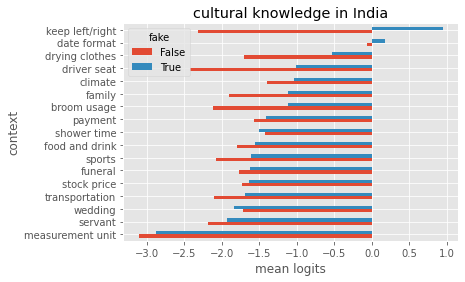

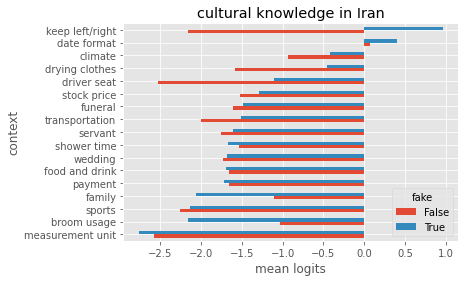

In [ ]:
country = df["country"].unique()
for i,c in enumerate(country):
  df[df["country"]==c].groupby(["context", "fake"])["max_logits"].agg("mean").unstack().sort_values(True).plot(kind='barh')
  plt.xlabel("mean max logits")
  plt.title(f"cultural knowledge in {c}")
  plt.show()

In [ ]:
key_map = {'United States':['united states','american'],'China':['china','chinese'],
               'India':['india','indian','hindu'],'Iran':['Iran','iranian','persian'],'Kenya':['kenya','kenyan']}

scores = {"country": [], "mask": []}
for i, row in tqdm(df.iterrows(), total=len(df)):
    country = row['country']
    key_words = key_map[country]
    for word in key_words:
      tokens = tokenizer.tokenize(word)
      size = len(tokens)
      if tokens[0] in row['tokens']:
        c_score = 0
        c_idx = row['tokens'].index(tokens[0])
        for j in range(0,size):
          c_score = c_score + row['logits'][c_idx+j]
          
        scores['country'].append(c_score/size)
        break

    m_score = 0
    tokens = tokenizer.tokenize(row['Ans'])
    try:
      idx = row['tokens'].index(tokens[0].lower())
    except:
      idx = row['tokens'].index(tokens[0].lower()+"s")
    size = len(tokens)
    for j in range(0,size):
      m_score = m_score + row['logits'][idx+j]
    scores['mask'].append(m_score/size)


df["country_score"] = scores['country']
df["culture_score"] = scores['mask']

  0%|          | 0/2975 [00:00<?, ?it/s]

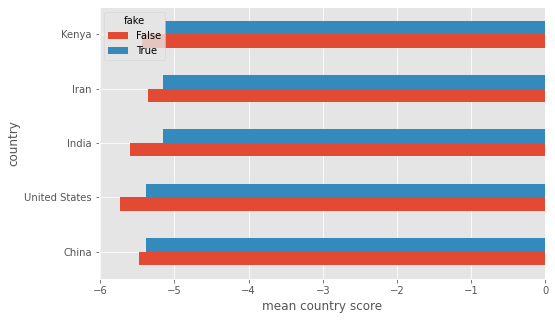

In [ ]:
df.groupby(["country", "fake"])["country_score"].agg("mean").unstack().sort_values(True).plot(kind='barh', figsize=(8, 5))
plt.xlabel("mean country score")
plt.show()

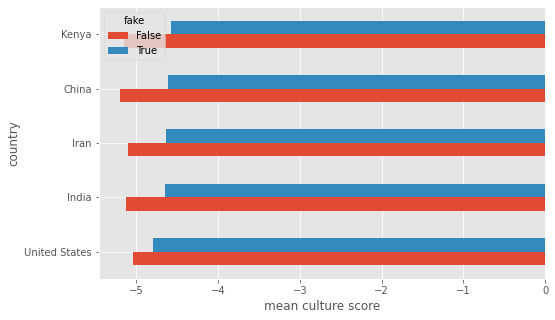

In [ ]:
df.groupby(["country", "fake"])["culture_score"].agg("mean").unstack().sort_values(True).plot(kind='barh', figsize=(8, 5))
plt.xlabel("mean culture score")
plt.show()

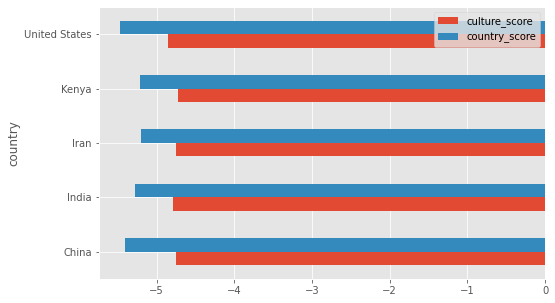

In [ ]:
df.groupby("country")[["culture_score","country_score"]].mean().plot(kind='barh', figsize=(8, 5))

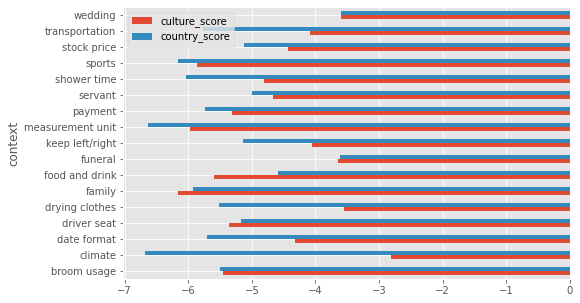

In [ ]:
df.groupby("context")[["culture_score","country_score"]].mean().plot(kind='barh', figsize=(8, 5))